In [6]:
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
# Load data from JSON file
file_path = 'C:/Users/HP/Desktop/angles_output_3.json'
data = []
with open(file_path) as f:
    for line in f:
        data.append(json.loads(line))

In [8]:
# Convert JSON data to DataFrame
df = pd.DataFrame(data)


In [9]:
# Separate features and labels
X = df.drop('Label', axis=1).values
y = df['Label'].values

In [10]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [11]:
# Train-test split (we use the test data for evaluation)
_, X_test, _, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [12]:
# Reshape data for LSTM
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [13]:
# Load the best model
best_model = tf.keras.models.load_model('best_verification_model.h5')

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1075  
Test Loss: 0.13293933868408203
Test Accuracy: 0.9523809552192688


In [15]:
# Generate predictions
y_pred = np.argmax(best_model.predict(X_test_lstm), axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9523809523809523


In [17]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

     Downdog       0.93      1.00      0.96        54
     Goddess       0.88      0.97      0.92        31
       Plank       1.00      0.90      0.95        30
        Tree       1.00      1.00      1.00        31
    Warrior2       0.97      0.88      0.93        43

    accuracy                           0.95       189
   macro avg       0.96      0.95      0.95       189
weighted avg       0.96      0.95      0.95       189



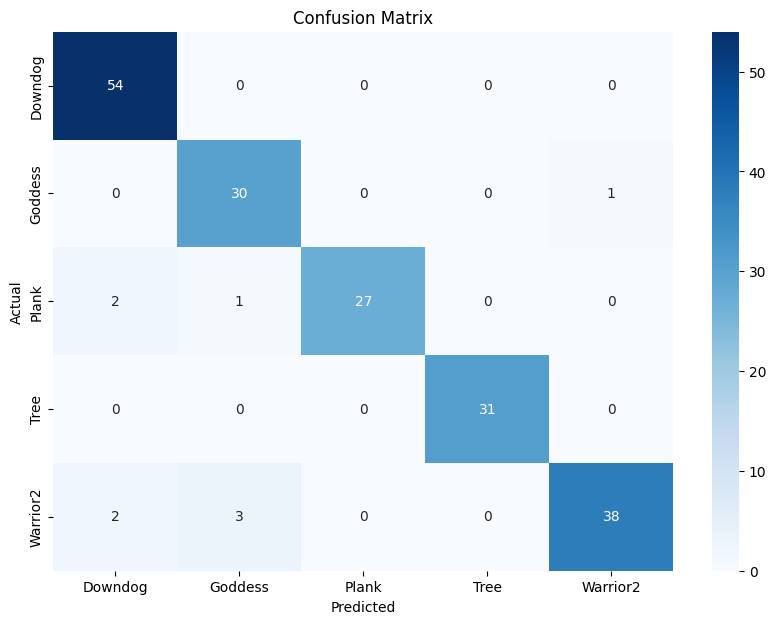

In [18]:
# Plot a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()